In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch 


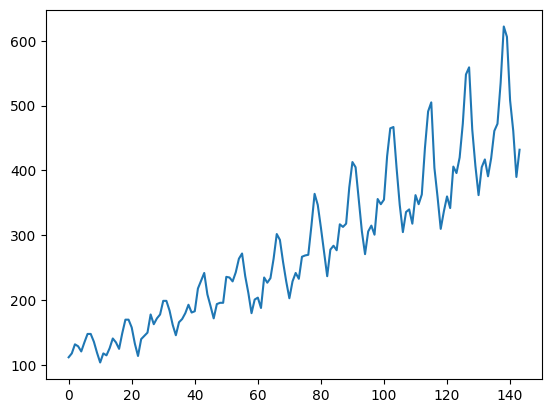

In [3]:
df = pd.read_csv('data.csv')
timeseries = df[['Passengers']].values.astype(float)
plt.plot(timeseries)

In [4]:
train_size = int(len(timeseries) * .67)
test_size = len(timeseries) - train_size
train, test = timeseries[0:train_size], timeseries[train_size:len(timeseries)]
print(len(train), len(test))

96 48


In [5]:
def create_dataset(dataset, lookback): 
    X, y = [], []
    for i in range(len(dataset) - lookback): 
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X).float(), torch.tensor(y).float()



In [8]:
lookback = 5
X_train, y_train = create_dataset(train, lookback)
X_test, y_test = create_dataset(test, lookback)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([91, 5, 1]) torch.Size([91, 5, 1]) torch.Size([43, 5, 1]) torch.Size([43, 5, 1])


AttributeError: Line2D.set() got an unexpected keyword argument 'width'

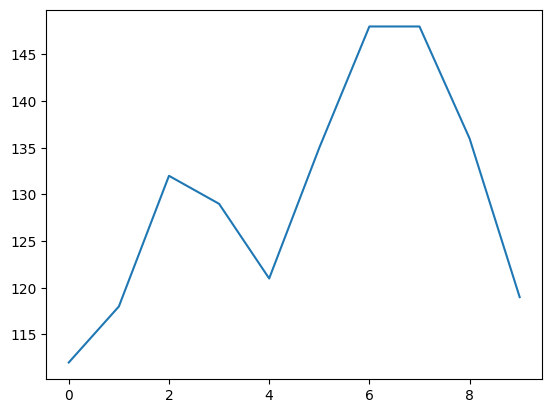

In [16]:

for i in range(3): 
    plt.figure()
    plt.plot(timeseries[:10])
    plt.plot(range(i, i+lookback), X_train[i].numpy(), 'ro')
    plt.plot(range(i+1, i+lookback+1), y_train[i].numpy(), 'bx')
    plt.show()